In [10]:
from pymatgen.ext.matproj import MPRester
with MPRester("hAyTf8zq9AWy4PrFn") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-569779")

    # Dos for material id
    dos = m.get_dos_by_material_id("mp-569779")

    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-569779")

La bande interdite est indirecte avec une énergie de 0.02 eV.


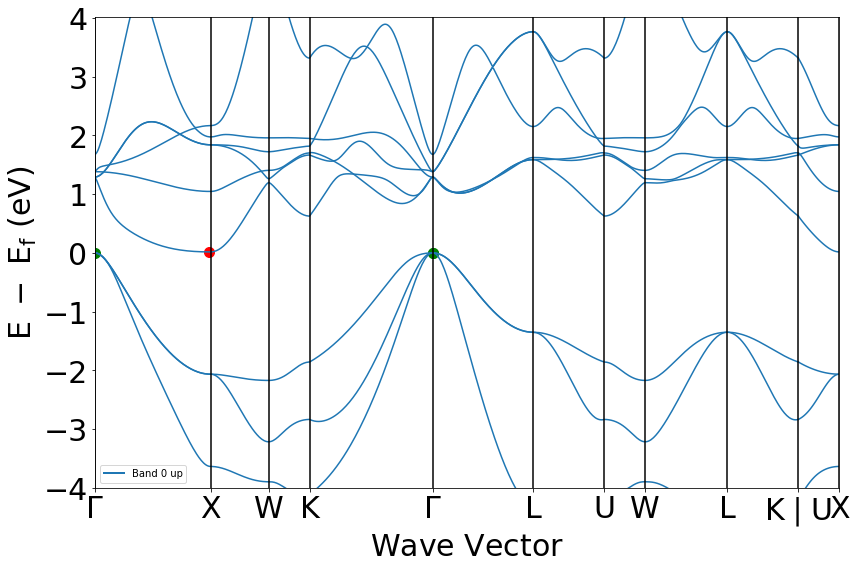

In [14]:
from pymatgen.ext.matproj import MPRester

with MPRester("hAyTf8zq9AWy4PrFn") as m:
    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-569779")

    # Get the band gap information
    band_gap = bandstructure.get_band_gap()

    if band_gap['direct']:
        print("La bande interdite est directe avec une énergie de {:.2f} eV.".format(band_gap['energy']))
    else:
        print("La bande interdite est indirecte avec une énergie de {:.2f} eV.".format(band_gap['energy']))

    bplot= BSPlotter(bandstructure).get_plot(vbm_cbm_marker=True)

[0.0, 0.9853562636385541, 0.9853562636385541, 1.4780343954578317, 1.4780343954578317, 1.8264104434095616, 1.8264104434095616, 2.8715385872652, 2.8715385872652, 3.724882143354301, 3.724882143354301, 4.328287158546775, 4.328287158546775, 4.67666320649851, 4.67666320649851, 5.37341530240198, 5.37341530240198, 5.976820317594466, 6.325196365546348]


La pente la plus forte sur la dernière bande de valence est - 2.0973124911885326 . Ce qui correspond à la direction Γ-L (flèche rouge sur le graphe). 


La pente la plus faible sur la dernière bande de valence est - 0.21596249788295677 . Ce qui correspond à la direction X-W (flèche bleu sur le graphe). 


La pente la plus forte sur la dernière bande de conduction est  2.3938549812327037 . Ce qui correspond à la direction X-W (flèche verte sur le graphe). 


La pente la plus faible sur la dernière bande de conduction est  0.3485114499053508 . Ce qui correspond à la direction Γ-L (flèche jaune sur le graphe). 


 


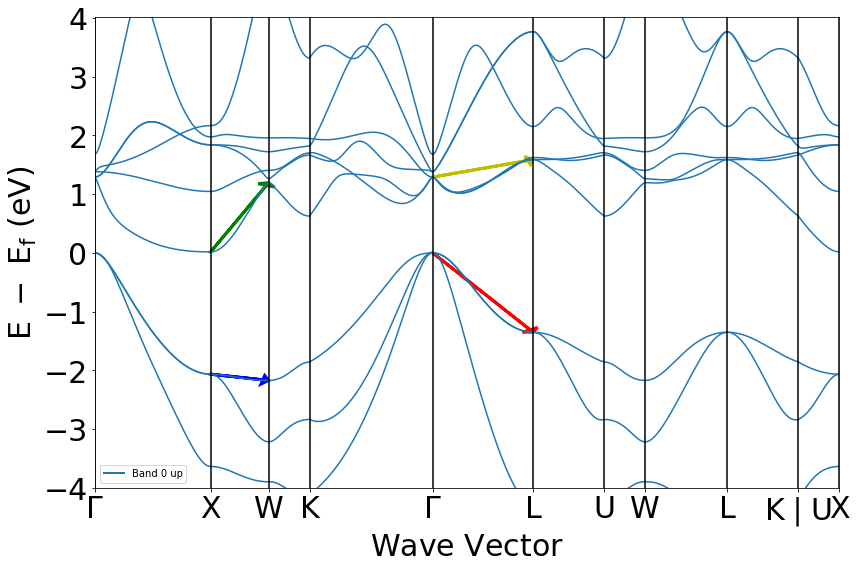

In [19]:
import numpy as np
import matplotlib.pyplot as plt

bandplot = BSPlotter(bandstructure)
data = bandplot.bs_plot_data()
en = data.get('energy')
vbm = bandstructure.get_vbm()
cbm = bandstructure.get_cbm()
bande_val_ind = list(vbm['band_index'].values())[0]
bande_cond_ind = list(cbm['band_index'].values())[0]
D = data.get('ticks').get('distance')

print(D)

pente_Val = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
pente_Con = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]

dist = np.array([D[1]-D[0] , D[3]-D[2] , D[5]-D[4] , D[7]-D[6] , D[9]-D[8] , D[11]-D[10], D[13]-D[12], D[15]-D[14], D[17]-D[16], D[18]-D[17] ])

for i in range(0,10):
    pente_Val[i] =abs((en.get('1')[i][bande_val_ind[-1]][-1] - en.get('1')[i][bande_val_ind[-1]][0])/dist[i]) #calcule des pentes en valeur absolue
    pente_Con[i] =abs((en.get('1')[i][bande_cond_ind[0]][-1] - en.get('1')[i][bande_cond_ind[0]][0])/dist[i])
    
maxVal = np.amax(pente_Val)
minVal = np.amin(pente_Val)


maxCon = np.amax(pente_Con)
minCon = np.amin(pente_Con)


bandplot.get_plot()
#max dispersion valence
plt.arrow(D[7], (en.get('1')[4][bande_val_ind[-1]])[0], dist[4], en.get('1')[4][bande_val_ind[-1]][-1] - en.get('1')[4][bande_val_ind[-1]][0], color = 'r', head_width=0.15, head_length=0.05, linewidth=3,length_includes_head=True)
#min dipersion valence
plt.arrow(D[1], (en.get('1')[1][bande_val_ind[-1]])[0], dist[1], en.get('1')[1][bande_val_ind[-1]][-1] - en.get('1')[1][bande_val_ind[-1]][0], color = 'b', head_width=0.15, head_length=0.05, linewidth=3,length_includes_head=True)
#max dispersion conduction
plt.arrow(D[1], (en.get('1')[1][bande_cond_ind[0]])[0], dist[1], en.get('1')[1][bande_cond_ind[0]][-1] - en.get('1')[1][bande_cond_ind[0]][0], color = 'g', head_width=0.15, head_length=0.05, linewidth=3,length_includes_head=True)
#min dispersion conduction
plt.arrow(D[7], (en.get('1')[4][bande_cond_ind[0]])[0], dist[4], en.get('1')[4][bande_cond_ind[0]][-1] - en.get('1')[4][bande_cond_ind[0]][0], color = 'y', head_width=0.15, head_length=0.05, linewidth=3,length_includes_head=True)

print('\n')
print("La pente la plus forte sur la dernière bande de valence est -" , maxVal , ". Ce qui correspond à la direction Γ-L (flèche rouge sur le graphe). ")
print('\n')
print("La pente la plus faible sur la dernière bande de valence est -" , minVal , ". Ce qui correspond à la direction X-W (flèche bleu sur le graphe). ")
print('\n')
print("La pente la plus forte sur la dernière bande de conduction est " , maxCon , ". Ce qui correspond à la direction X-W (flèche verte sur le graphe). ")
print('\n')
print("La pente la plus faible sur la dernière bande de conduction est " , minCon , ". Ce qui correspond à la direction Γ-L (flèche jaune sur le graphe). ")
print('\n')
print(" ")

Dans le cas du point situé au maximum de la bande de valence (courbe verte),
La masse effective de l'électron vaut -7.374568350419203e-31 kg. Ceci correspond à -0.8095914315972339 fois la masse d'un électron libre. La masse négative peut surprendre mais elle représente la masse d'un trou. Etant 'plus léger', le trou a gagné en mobilité.


Dans le cas du point situé au minimum de la bande de conduction avec une première extrapolation (courbe  rouge),
La masse effective de l'électron vaut 5.318048882998633e-31 kg. Ceci correspond à 0.5838235682290738 fois la masse d'un électron libre. Etant 'plus léger', l'électron a gagné en mobilité.


Il est bon de remarquer que l'extrapolation sur le minima de la bande de conduction est fortement influencé par le choix des points sur la bande d'énergie qui servent à l'extrapolation. De ce fait, la masse effective est totalement différente en fonction des points choisis.
Dans un 2e cas (courbe jaune), on peut trouver une masse effective de 1.615986612

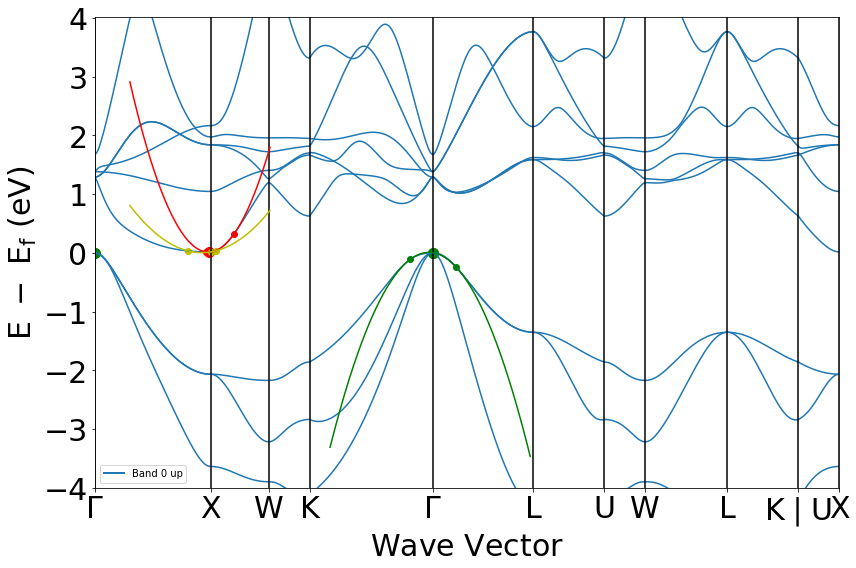

In [22]:
#BANDE DE  VALENCE

Xv = [data.get('distances')[3][-20],data.get('distances')[4][1],data.get('distances')[4][20]]
Yv = [en.get('1')[3][bande_val_ind[-1]][-20], en.get('1')[4][bande_val_ind[-1]][0], en.get('1')[4][bande_val_ind[-1]][20]]

#Approximation de coefficient de E(k) pour la bande de valence
av = np.polyfit(Xv,Yv,2)[0]
bv = np.polyfit(Xv,Yv,2)[1]
cv = np.polyfit(Xv,Yv,2)[2]


var_kv = np.arange(2,3.7,0.01)
E_v = av*var_kv**2 + bv*var_kv + cv


av_SI = 2*av*(1.602*10**(-19))*(10**(-10))**2 #transformation du coefficient 'a' des unités atomiques vers les unité du SI

hbar = 1.054*10**(-34) # constante de PLanck réduite en [J/s]
m_elec = 9.109E-31 #masse d'un electron [kg]

mv_eff_elc = (hbar**2)/av_SI
coefv = mv_eff_elc / m_elec




#BANDE DE CONDUCTION
#premiere extrapolation 

Xc = [ data.get('distances')[0][-5],data.get('distances')[0][-1],data.get('distances')[1][20]]
Yc = [ en.get('1')[0][bande_cond_ind[0]][-5], en.get('1')[0][bande_cond_ind[0]][-1], en.get('1')[1][bande_cond_ind[0]][20]]

ac = np.polyfit(Xc,Yc,2)[0]
bc = np.polyfit(Xc,Yc,2)[1]
cc = np.polyfit(Xc,Yc,2)[2]

var_kc = np.arange(0.3,1.5,0.01)
E_c = ac*var_kc**2 + bc*var_kc + cc

ac_SI = 2*ac*(1.602*10**(-19))*(10**(-10))**2

mc_eff_elc = (hbar**2)/ac_SI
coefc = mc_eff_elc / m_elec

#seconde extrapolation

Xc2 = [ data.get('distances')[0][-20],data.get('distances')[0][-1],data.get('distances')[1][5]]
Yc2 = [ en.get('1')[0][bande_cond_ind[0]][-20], en.get('1')[0][bande_cond_ind[0]][-1], en.get('1')[1][bande_cond_ind[0]][5]]

ac2 = np.polyfit(Xc2,Yc2,2)[0]
bc2 = np.polyfit(Xc2,Yc2,2)[1]
cc2 = np.polyfit(Xc2,Yc2,2)[2]

var_kc2 = np.arange(0.3,1.5,0.01)
E_c2 = ac2*var_kc2**2 + bc2*var_kc2 + cc2

ac_SI2 = 2*ac2*(1.602*10**(-19))*(10**(-10))**2

mc_eff_elc2 = (hbar**2)/ac_SI2
coefc2 = mc_eff_elc2 / m_elec

print("Dans le cas du point situé au maximum de la bande de valence (courbe verte),")
print("La masse effective de l'électron vaut", mv_eff_elc,"kg. Ceci correspond à", coefv, "fois la masse d'un électron libre. La masse négative peut surprendre mais elle représente la masse d'un trou. Etant 'plus léger', le trou a gagné en mobilité.")

print('\n')
print("Dans le cas du point situé au minimum de la bande de conduction avec une première extrapolation (courbe  rouge),")
print("La masse effective de l'électron vaut", mc_eff_elc,"kg. Ceci correspond à", coefc, "fois la masse d'un électron libre. Etant 'plus léger', l'électron a gagné en mobilité.")

print('\n')
print("Il est bon de remarquer que l'extrapolation sur le minima de la bande de conduction est fortement influencé par le choix des points sur la bande d'énergie qui servent à l'extrapolation. De ce fait, la masse effective est totalement différente en fonction des points choisis.")
print("Dans un 2e cas (courbe jaune), on peut trouver une masse effective de", mc_eff_elc2,"kg, correspondandt à", coefc2, "fois la masse d'un électron libre. Cette masse effective plus élevée que celle de l'électron classique signifie que dans cette situation, l'électron est moins mobile dans le cristal. Ce qui est très différent de ce qu'on a trouvé précédemment.")


bplot = BSPlotter(bandstructure).get_plot(vbm_cbm_marker=True)
plt.plot(var_kv, E_v,color ='g')
plt.scatter(Xv,Yv, color = 'g')
plt.plot(var_kc, E_c,color ='r')
plt.scatter(Xc,Yc, color = 'r')
plt.plot(var_kc2, E_c2,color ='y')
plt.scatter(Xc2,Yc2, color = 'y')
bplot.show()